# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [2]:
adv_data = pd.read_csv("./data/advertising.csv")
adv_data

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  
0                   Tunisia  2016-03-27 00:53:11              0  
1                     Nauru  2016-04-04 01:39:02              0  
2                San Marino  2016-03-13 20:35:42              0  
3                     Italy  2016-01-10 02:31:19              0  
4                   Iceland  2016-06-03 03:36:18              0  
..                      ...                  ...            ...  
995                 Lebanon  2016-02-11 21:49:00              1  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  
997                Mongolia  2016-02-01 17:24:57              1  
998               Guatemala  2016-03-24 02:35:54              0  
999                  Brazil  2016-06-03 21:43:21              1  

[1000 rows x 10 columns]

# 1. Exploratory Data Analysis

In [3]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
adv_data.describe(include="all")

Daily Time Spent on Site          Age   Area Income  \
count                1000.000000  1000.000000   1000.000000   
unique                       NaN          NaN           NaN   
top                          NaN          NaN           NaN   
freq                         NaN          NaN           NaN   
mean                   65.000200    36.009000  55000.000080   
std                    15.853615     8.785562  13414.634022   
min                    32.600000    19.000000  13996.500000   
25%                    51.360000    29.000000  47031.802500   
50%                    68.215000    35.000000  57012.300000   
75%                    78.547500    42.000000  65470.635000   
max                    91.430000    61.000000  79484.800000   

        Daily Internet Usage                    Ad Topic Line       City  \
count            1000.000000                             1000       1000   
unique                   NaN                             1000        969   
top                      NaN  Virtual 5thgeneration emulation  Lisamouth   
freq                     NaN                                1          3   
mean              180.000100                              NaN        NaN   
std                43.902339                              NaN        NaN   
min               104.780000                              NaN        NaN   
25%               138.830000                              NaN        NaN   
50%               183.130000                              NaN        NaN   
75%               218.792500                              NaN        NaN   
max               269.960000                              NaN        NaN   

               Male         Country            Timestamp  Clicked on Ad  
count   1000.000000            1000                 1000     1000.00000  
unique          NaN             237                 1000            NaN  
top             NaN  Czech Republic  2016-06-03 21:43:21            NaN  
freq            NaN               9                    1            NaN  
mean       0.481000             NaN                  NaN        0.50000  
std        0.499889             NaN                  NaN        0.50025  
min        0.000000             NaN                  NaN        0.00000  
25%        0.000000             NaN                  NaN        0.00000  
50%        0.000000             NaN                  NaN        0.50000  
75%        1.000000             NaN                  NaN        1.00000  
max        1.000000             NaN                  NaN        1.00000

In [5]:
adv_data.loc[:,"Clicked on Ad"].unique()

array([0, 1])

In [6]:
adv_data.loc[:,"Clicked on Ad"].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [7]:
adv_data.loc[:,"Male"].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

In [ ]:
# No hay categorias, esta columna sirve como un ID, no nos vale para nada 
adv_data.loc[:,"Ad Topic Line"].value_counts()

Ad Topic Line
Virtual 5thgeneration emulation                  1
Cloned 5thgeneration orchestration               1
Monitored national standardization               1
Organic bottom-line service-desk                 1
Triple-buffered reciprocal time-frame            1
                                                ..
Team-oriented grid-enabled Local Area Network    1
Centralized content-based focus group            1
Synergistic fresh-thinking array                 1
Grass-roots coherent extranet                    1
Persistent demand-driven interface               1
Name: count, Length: 1000, dtype: int64

In [5]:
adv_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
# en el sns.pairplot , metele de argumento hue= "Clicked on Ad"

In [9]:
adv_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

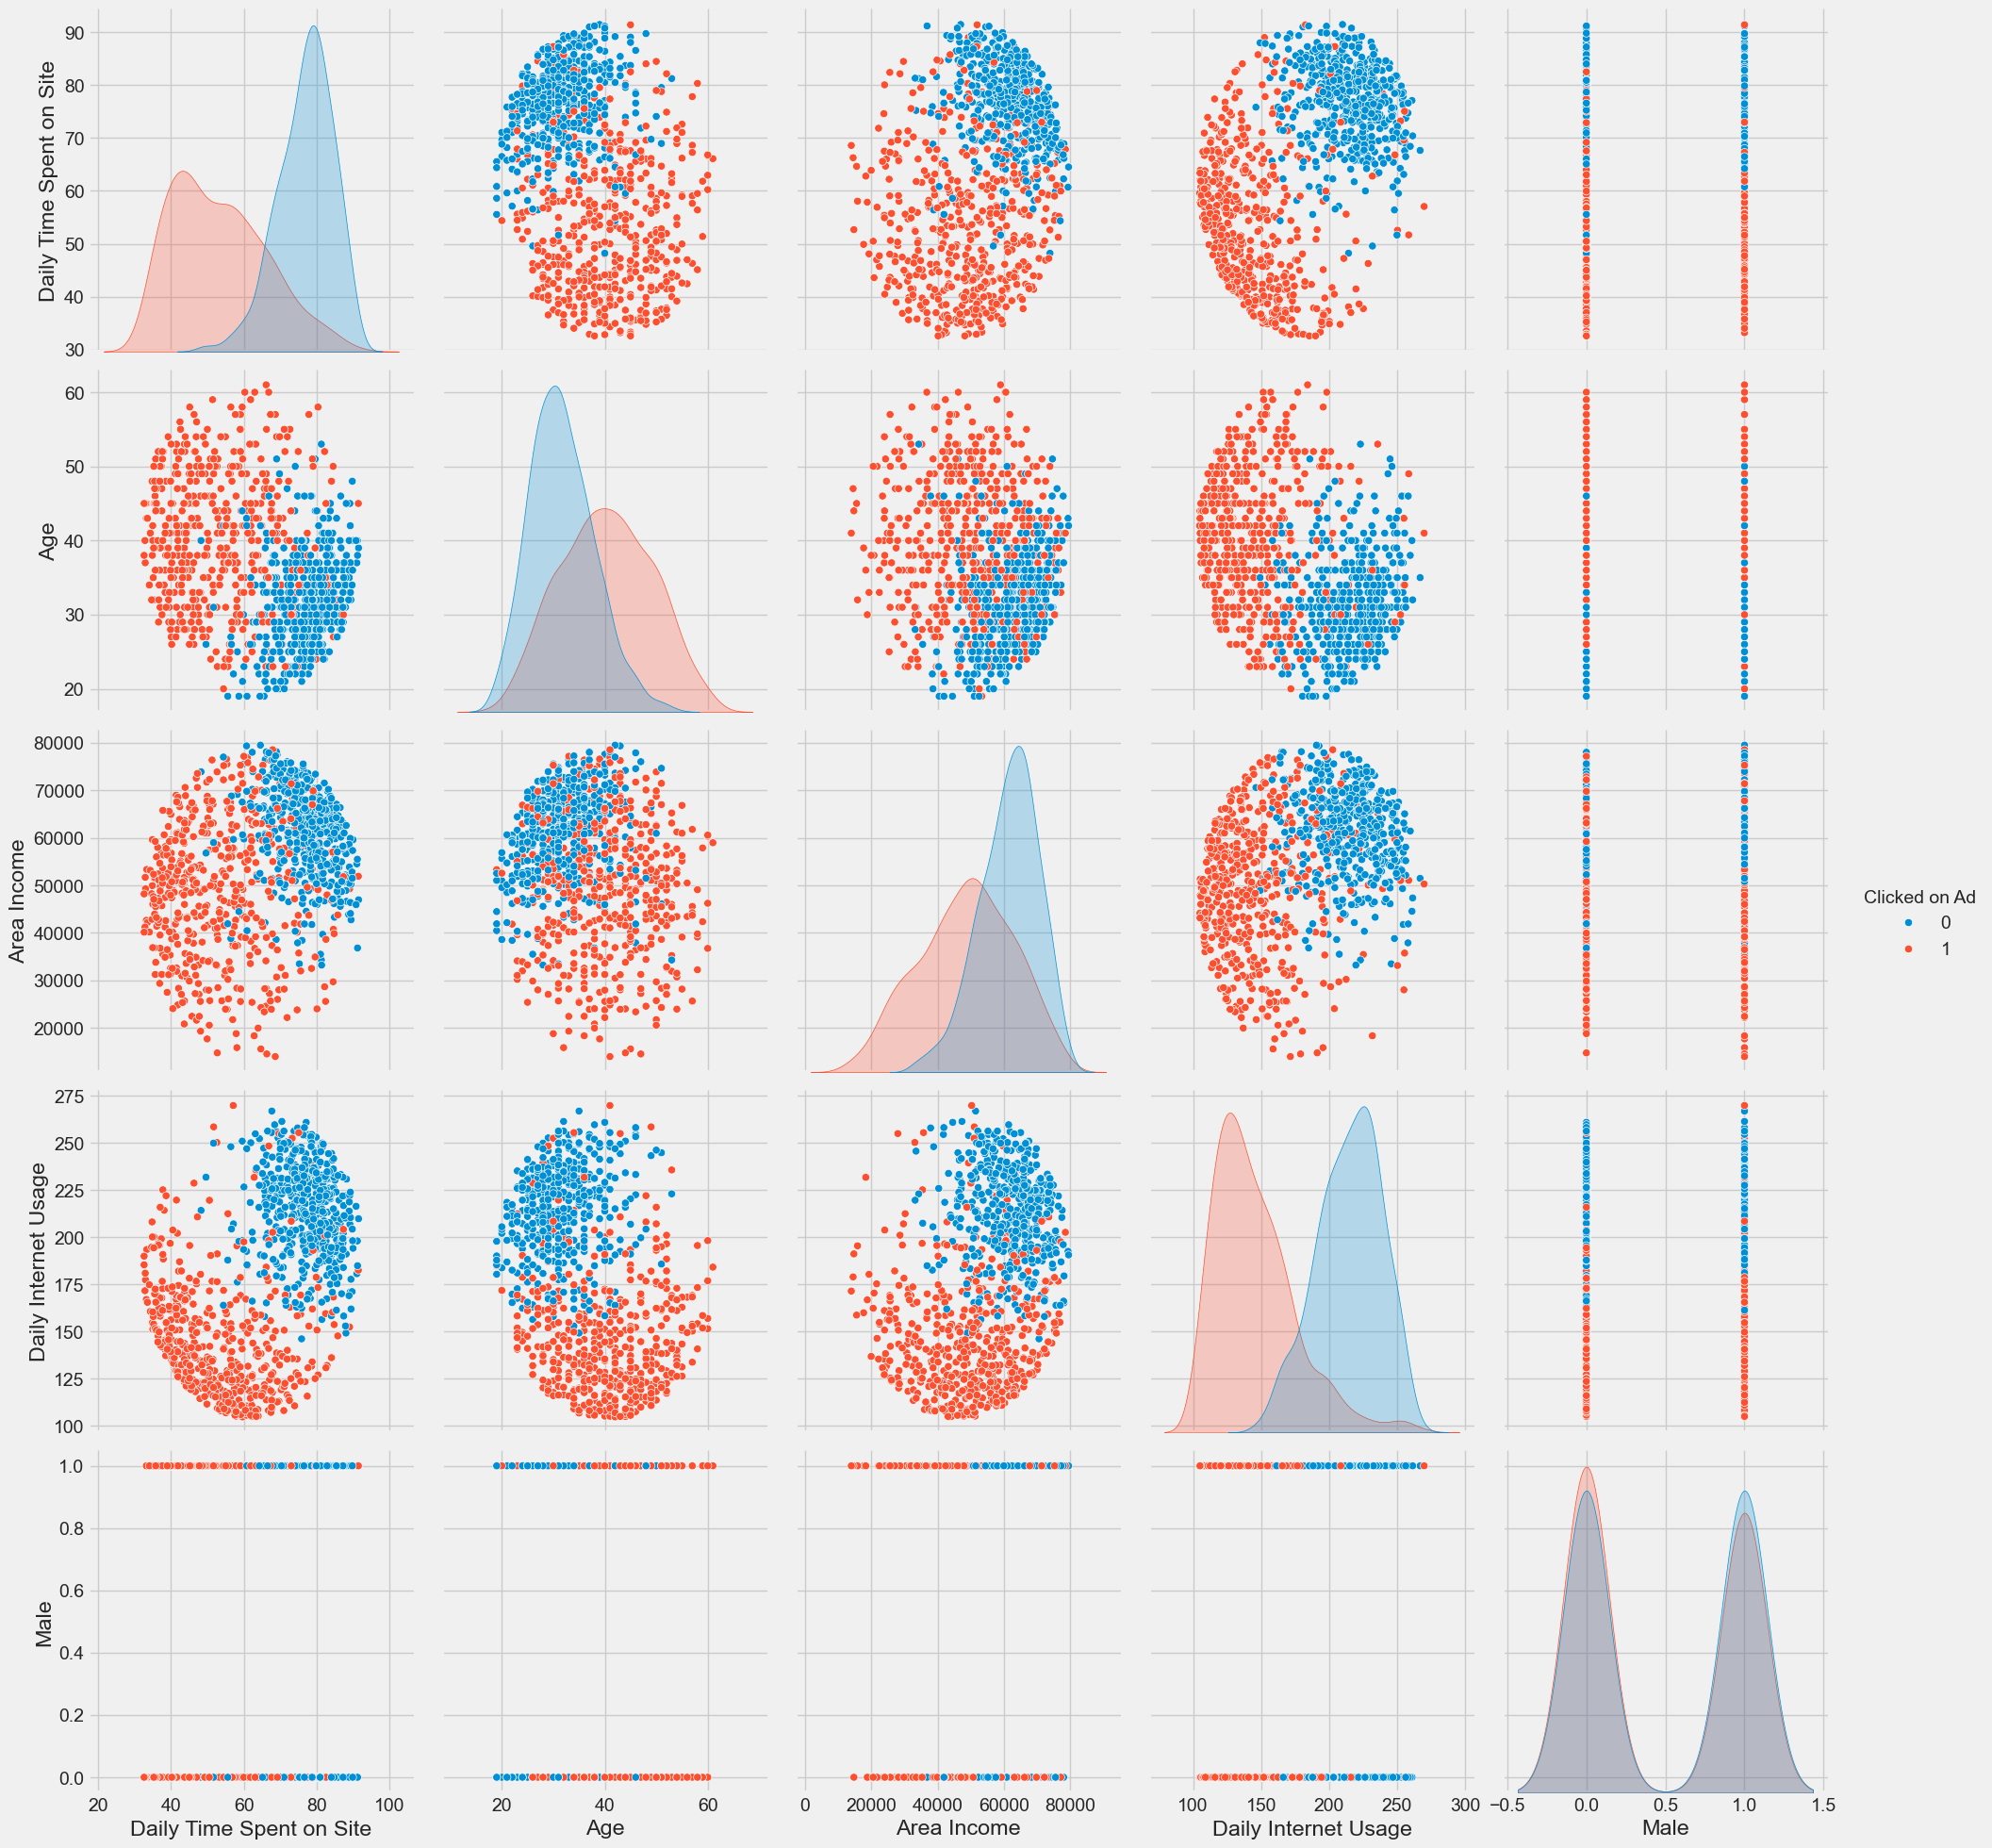

In [3]:
sns.pairplot(adv_data.dropna(),
            hue='Clicked on Ad',
            height=4,
            vars=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']);

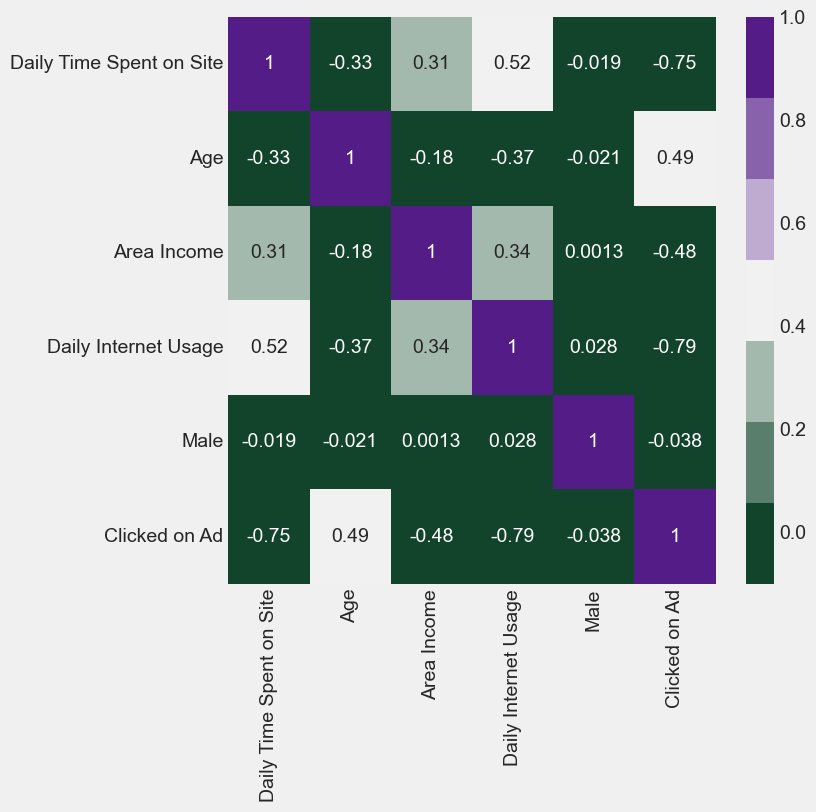

In [4]:
plt.figure(figsize=(7,7))
sns.heatmap(adv_data.loc[:,['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male','Clicked on Ad']].corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [12]:
adv_data.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [13]:
adv_data.loc[:,"Ad Topic Line"]

0         Cloned 5thgeneration orchestration
1         Monitored national standardization
2           Organic bottom-line service-desk
3      Triple-buffered reciprocal time-frame
4              Robust logistical utilization
                       ...                  
995            Fundamental modular algorithm
996          Grass-roots cohesive monitoring
997             Expanded intangible solution
998     Proactive bandwidth-monitored policy
999          Virtual 5thgeneration emulation
Name: Ad Topic Line, Length: 1000, dtype: object

In [14]:
adv_data.loc[:,"Ad Topic Line"].apply(lambda x: x.split())

0         [Cloned, 5thgeneration, orchestration]
1         [Monitored, national, standardization]
2           [Organic, bottom-line, service-desk]
3      [Triple-buffered, reciprocal, time-frame]
4              [Robust, logistical, utilization]
                         ...                    
995            [Fundamental, modular, algorithm]
996          [Grass-roots, cohesive, monitoring]
997             [Expanded, intangible, solution]
998     [Proactive, bandwidth-monitored, policy]
999          [Virtual, 5thgeneration, emulation]
Name: Ad Topic Line, Length: 1000, dtype: object

In [13]:
adv_data.loc[:,"Ad Topic Line"].apply(lambda x: int("orchestration" in x))

0      1
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Ad Topic Line, Length: 1000, dtype: int64

In [24]:
adv_data.loc[adv_data.loc[:,"Country"] == "Honduras"]

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
275                     47.66   29     27086.40                156.54   
388                     68.10   40     74903.41                227.73   
518                     59.22   55     39131.53                126.39   
578                     66.89   23     64433.99                208.24   
598                     83.53   36     67686.16                204.56   

                                        Ad Topic Line          City  Male  \
275                     Devolved responsive structure       Tinaton     0   
388                        Reactive composite project    Thomasstad     1   
518                    Polarized 5thgeneration matrix  North Andrew     1   
578                       Universal incremental array   Sandersland     1   
598  Customizable methodical Graphical User Interface  New Dawnland     0   

      Country            Timestamp  Clicked on Ad  
275  Honduras  2016-07-18 11:33:31              1  
388  Honduras  2016-02-05 16:50:58              0  
518  Honduras  2016-01-13 02:39:00              1  
578  Honduras  2016-01-04 07:28:43              0  
598  Honduras  2016-07-06 05:34:52              0

In [15]:
# Crea una columna en donde si "orchestration" se encuentra dentro de "Ad Topic Line" valga 1 y si no 0
adv_data.loc[:,"orchestration"] = 0
adv_data.loc[adv_data.loc[:,"Ad Topic Line"].str.contains("orchestration"),"orchestration"] = 1
adv_data

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  orchestration  
0                   Tunisia  2016-03-27 00:53:11              0              1  
1                     Nauru  2016-04-04 01:39:02              0              0  
2                San Marino  2016-03-13 20:35:42              0              0  
3                     Italy  2016-01-10 02:31:19              0              0  
4                   Iceland  2016-06-03 03:36:18              0              0  
..                      ...                  ...            ...            ...  
995                 Lebanon  2016-02-11 21:49:00              1              0  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1              0  
997                Mongolia  2016-02-01 17:24:57              1              0  
998               Guatemala  2016-03-24 02:35:54              0              0  
999                  Brazil  2016-06-03 21:43:21              1              0  

[1000 rows x 11 columns]

In [16]:
# Aplica un Label Encoder a Ad Topic Line y City
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

adv_data['Ad Topic Line'] = le.fit_transform(adv_data['Ad Topic Line'])
adv_data['City'] = le.fit_transform(adv_data['City'])
adv_data


Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

     Ad Topic Line  City  Male                 Country            Timestamp  \
0               91   961     0                 Tunisia  2016-03-27 00:53:11   
1              464   903     1                   Nauru  2016-04-04 01:39:02   
2              566   111     0              San Marino  2016-03-13 20:35:42   
3              903   939     1                   Italy  2016-01-10 02:31:19   
4              766   805     0                 Iceland  2016-06-03 03:36:18   
..             ...   ...   ...                     ...                  ...   
995            345   126     1                 Lebanon  2016-02-11 21:49:00   
996            359   488     1  Bosnia and Herzegovina  2016-04-22 02:07:01   
997            263   798     1                Mongolia  2016-02-01 17:24:57   
998            641   935     0               Guatemala  2016-03-24 02:35:54   
999            971   744     0                  Brazil  2016-06-03 21:43:21   

     Clicked on Ad  orchestration  
0                0              1  
1                0              0  
2                0              0  
3                0              0  
4                0              0  
..             ...            ...  
995              1              0  
996              1              0  
997              1              0  
998              0              0  
999              1              0  

[1000 rows x 11 columns]

In [17]:
# Aplica un Label Encoder a Ad Topic Line y City

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [19]:
# Haz un drop de la siguentes columnas 'Ad Topic Line', 'City', 'Male', 'Country', 'orchestration'
adv_data = adv_data.drop(columns=['Ad Topic Line', 'City', 'Male', 'Country', 'orchestration'])
adv_data

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

               Timestamp  Clicked on Ad  
0    2016-03-27 00:53:11              0  
1    2016-04-04 01:39:02              0  
2    2016-03-13 20:35:42              0  
3    2016-01-10 02:31:19              0  
4    2016-06-03 03:36:18              0  
..                   ...            ...  
995  2016-02-11 21:49:00              1  
996  2016-04-22 02:07:01              1  
997  2016-02-01 17:24:57              1  
998  2016-03-24 02:35:54              0  
999  2016-06-03 21:43:21              1  

[1000 rows x 6 columns]

In [20]:
# Convierte la columna Timestamp a datetime
adv_data['Timestamp'] = pd.to_datetime(adv_data['Timestamp'])
adv_data['Timestamp']


0     2016-03-27 00:53:11
1     2016-04-04 01:39:02
2     2016-03-13 20:35:42
3     2016-01-10 02:31:19
4     2016-06-03 03:36:18
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:01
997   2016-02-01 17:24:57
998   2016-03-24 02:35:54
999   2016-06-03 21:43:21
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [21]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Timestamp                 1000 non-null   datetime64[ns]
 5   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 47.0 KB


In [22]:
adv_data.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

            Timestamp  Clicked on Ad  
0 2016-03-27 00:53:11              0  
1 2016-04-04 01:39:02              0  
2 2016-03-13 20:35:42              0  
3 2016-01-10 02:31:19              0  
4 2016-06-03 03:36:18              0

In [23]:
# Crea tres columnas nuevas que sean: "month", "hour", "weekday".
# Usa la columna "Timestamp" para extraer esos valores
adv_data.loc[:,'month'] = adv_data.loc[:,'Timestamp'].dt.month
adv_data.loc[:,'hour'] = adv_data.loc[:,'Timestamp'].dt.hour
adv_data.loc[:,'weekday'] = adv_data.loc[:,'Timestamp'].dt.weekday
adv_data

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

              Timestamp  Clicked on Ad  month  hour  weekday  
0   2016-03-27 00:53:11              0      3     0        6  
1   2016-04-04 01:39:02              0      4     1        0  
2   2016-03-13 20:35:42              0      3    20        6  
3   2016-01-10 02:31:19              0      1     2        6  
4   2016-06-03 03:36:18              0      6     3        4  
..                  ...            ...    ...   ...      ...  
995 2016-02-11 21:49:00              1      2    21        3  
996 2016-04-22 02:07:01              1      4     2        4  
997 2016-02-01 17:24:57              1      2    17        0  
998 2016-03-24 02:35:54              0      3     2        3  
999 2016-06-03 21:43:21              1      6    21        4  

[1000 rows x 9 columns]

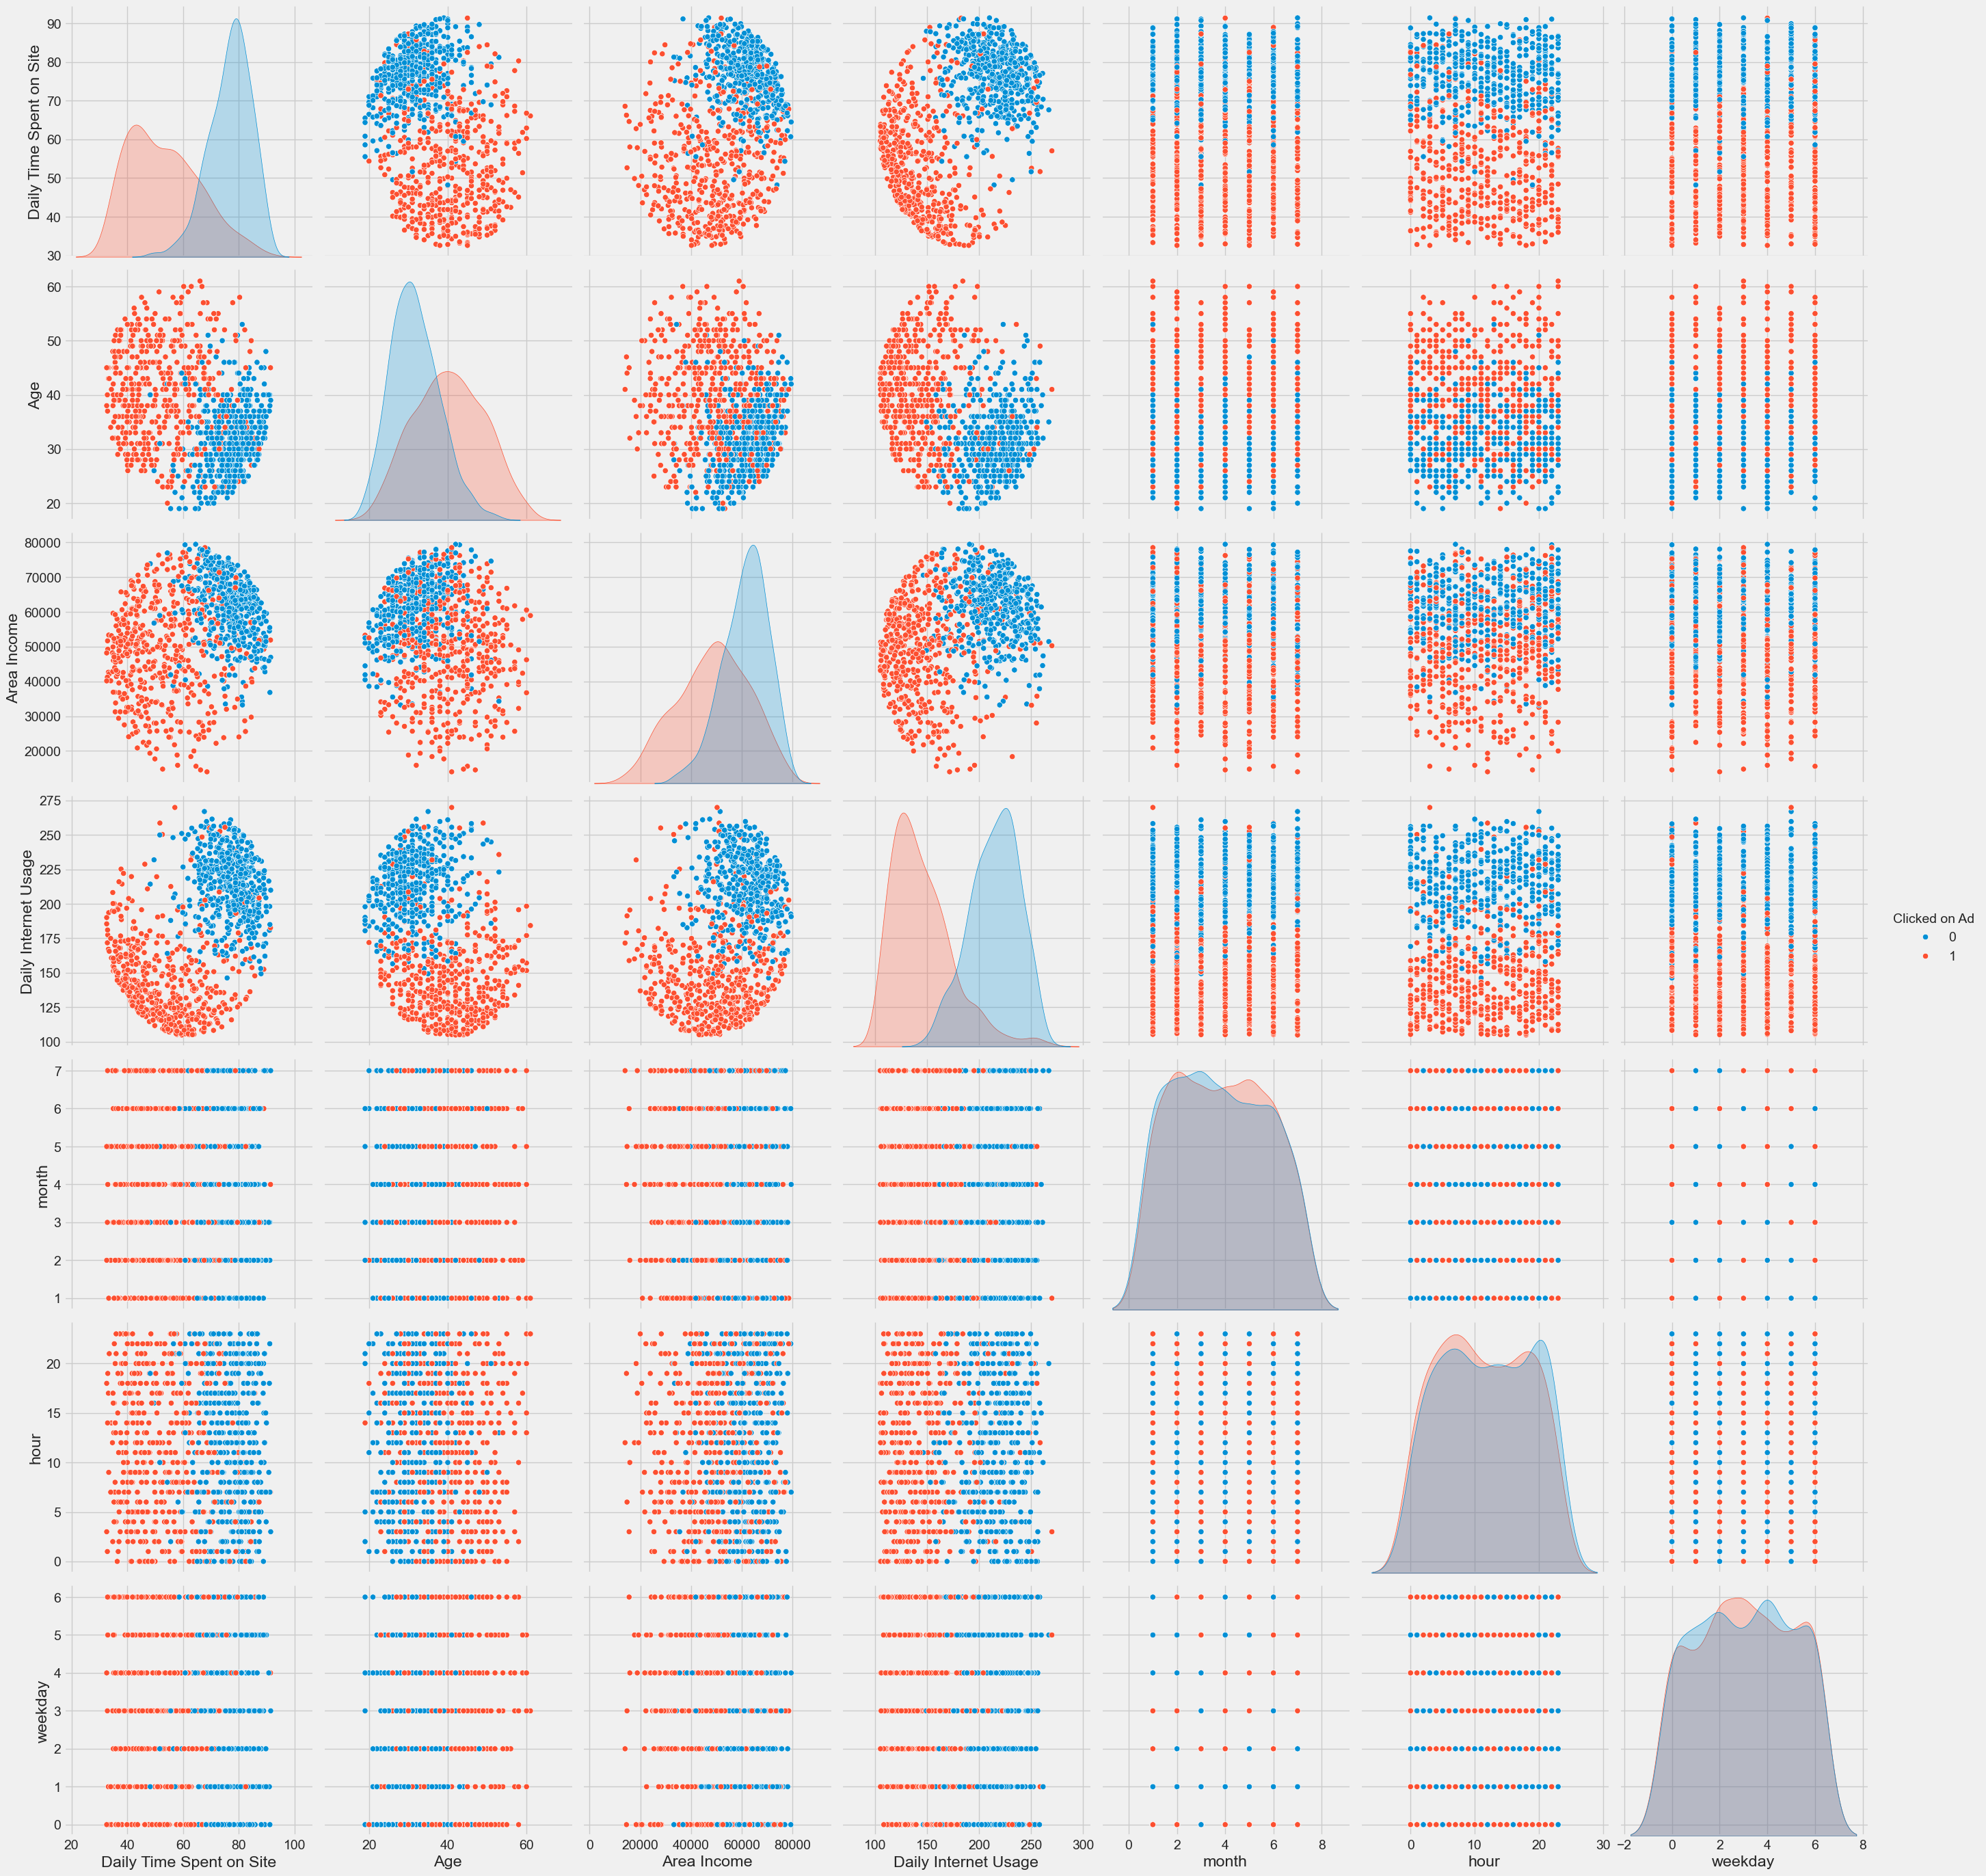

In [24]:
# en el sns.pairplot , metele de argumento hue= "Clicked on Ad"
sns.pairplot(adv_data.dropna(),
            hue='Clicked on Ad',
            height=4,
            vars=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage',"month", "hour", "weekday"]);

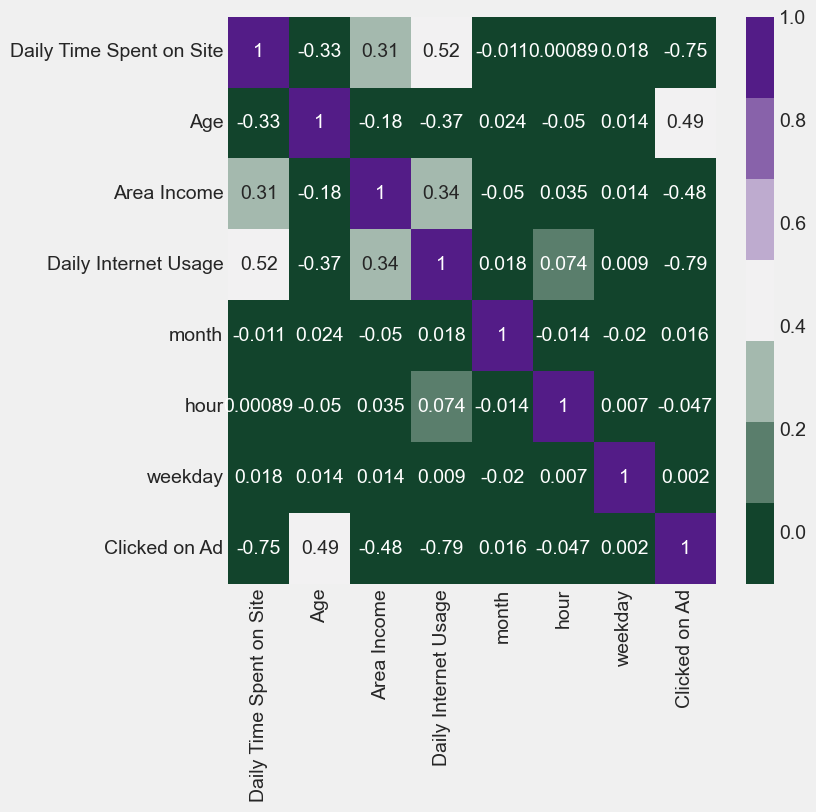

In [25]:
plt.figure(figsize=(7,7))
sns.heatmap(adv_data.loc[:,['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage',"month", "hour", "weekday","Clicked on Ad"]].corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

In [26]:
# Ahora haz un drop de las columnas 'month', 'hour', 'weekday'.
# Si ya sé que las acabas de crear, pero asi es la vida :)
# Jose Luis, Chinga a tu madre :) 
# adv_data = adv_data.drop(columns=['Timestamp'])
adv_data.head(5)


Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

            Timestamp  Clicked on Ad  month  hour  weekday  
0 2016-03-27 00:53:11              0      3     0        6  
1 2016-04-04 01:39:02              0      4     1        0  
2 2016-03-13 20:35:42              0      3    20        6  
3 2016-01-10 02:31:19              0      1     2        6  
4 2016-06-03 03:36:18              0      6     3        4


#### 2. Train test split


In [27]:
# Nuestra < y > (target) será "Clicked on Ad"
y = adv_data.loc[:,"Clicked on Ad"]
X = adv_data.iloc[:,:4]

In [28]:
# train_test_split test_size = 0.2, random_state = 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (800, 4)
X_test (200, 4)
y_train (800,)
y_test (200,)



#### 3. StandardScaler()


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Lo siguiente es la forma correcta de hacerlo, existe la posibilidad de hacer scaler.fit_transform pero no es recomendable

In [32]:

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
scaler.inverse_transform(X_train)

array([[7.327000e+01, 2.800000e+01, 6.730139e+04, 2.162400e+02],
       [5.156000e+01, 4.600000e+01, 6.310219e+04, 1.248500e+02],
       [5.630000e+01, 4.900000e+01, 6.743096e+04, 1.352400e+02],
       ...,
       [7.394000e+01, 2.600000e+01, 5.541106e+04, 2.361500e+02],
       [7.864000e+01, 3.100000e+01, 6.028347e+04, 2.352800e+02],
       [4.206000e+01, 3.400000e+01, 4.324119e+04, 1.315500e+02]])

# 3. Implement Logistic Regression in Scikit-Learn and predict

In [38]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [39]:
from sklearn.model_selection import KFold, cross_val_score

In [41]:
# crea dos variables un LogisticRegression sin entrenar y un KFold(n_splits = 5)
# luego crea la varible que use cross_val_score que tenga dentro lo siguiente en este orden: 
# ( tu_modelo_LogisticRegression, X_train, y_train, cv = tu_variable_de_KFold, scoring = "accuracy" )

kfold = KFold(n_splits = 5)
scores = cross_val_score(logisticRegr, X_train, y_train, cv=kfold, scoring='accuracy')

In [42]:
print("Puntajes de validación cruzada:", scores)
print("Promedio de accuracy:", scores.mean())
print("Desviación estándar de accuracy:", scores.std())

Puntajes de validación cruzada: [0.96875 0.95    0.98125 0.95625 0.98125]
Promedio de accuracy: 0.9675
Desviación estándar de accuracy: 0.012747548783981946


In [ ]:
print(cv_results)
print(cv_results.mean())
print(cv_results.std())

[0.96875 0.95    0.98125 0.95625 0.98125]
0.9675
0.012747548783981946


# 4. Evaluate models


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [46]:
# Crea un variable y_pred que sean las predicciones del X_test
logisticRegr.fit(X_train, y_train)
logisticRegr.predict(X_test)
logisticRegr.score(X_test,y_test)

0.98

In [48]:
# accuracy_score
accuracy_score(y_test,logisticRegr.predict(X_test))

0.98

0.98


#### 1. Confusion Matrix


In [50]:
confusion_matrix(y_test,logisticRegr.predict(X_test))

array([[107,   1],
       [  3,  89]])

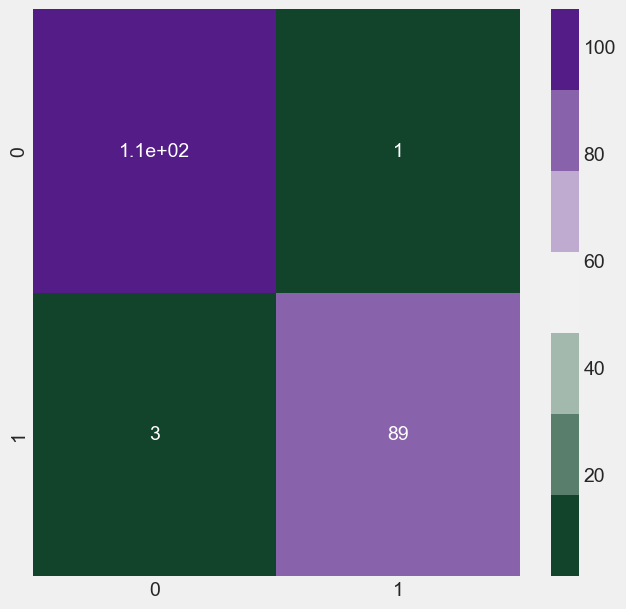

In [54]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,logisticRegr.predict(X_test)),
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

<AxesSubplot:>

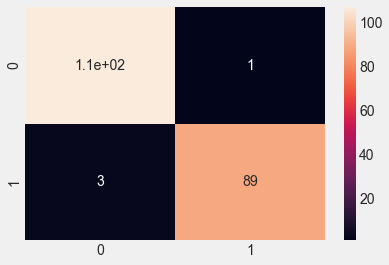


#### 2. Precision


In [55]:
# TP/(TP+FP) = 89/(89+1)
89/(89+1)

0.9888888888888889

In [ ]:
p = 89/(89+1)

0.9888888888888889



#### 3. Recall


In [56]:
# TP/(TP+FN) = 89/(89+3)
89/(89+3)

0.967391304347826

In [58]:
r = 89/(89+3)

0.967391304347826



#### 4. F1 Score


In [ ]:
# 2*precision*recall/(precision + recall) 

In [ ]:
2*p*r/(p+r)

In [59]:
2*p*r/(p+r)

0.978021978021978

0.978021978021978



#### 5. ROC curve

In [60]:
roc_auc_score(y_test, logisticRegr.predict(X_test))

np.float64(0.9790660225442834)

In [61]:
roc_auc_score(y_test, logisticRegr.predict(X_test))

np.float64(0.9790660225442834)

In [62]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict(X_test))

In [64]:
thresholds

array([inf,  1.,  0.])

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
thresholds

array([2, 1, 0], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

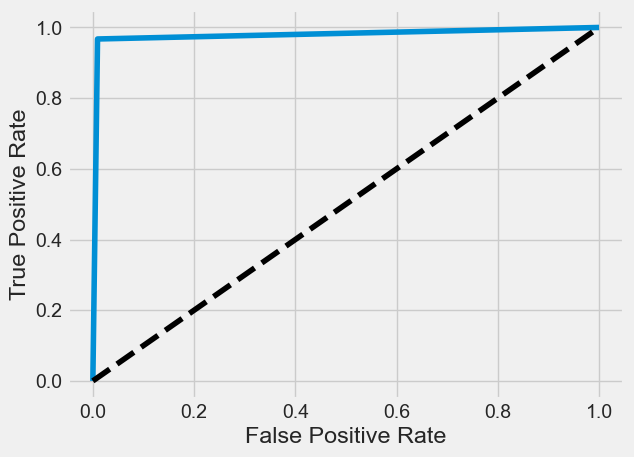

In [68]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

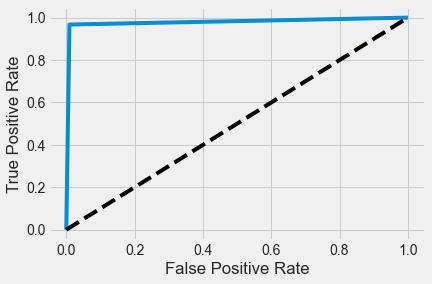

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [69]:
y_pred_prob = logisticRegr.predict_proba(X_test)
y_pred_prob

array([[9.71389146e-01, 2.86108541e-02],
       [9.84800589e-01, 1.51994112e-02],
       [9.92185140e-01, 7.81486017e-03],
       [6.47784911e-04, 9.99352215e-01],
       [9.62703504e-01, 3.72964956e-02],
       [1.81679348e-05, 9.99981832e-01],
       [4.00181717e-04, 9.99599818e-01],
       [1.39008429e-04, 9.99860992e-01],
       [9.91616546e-01, 8.38345380e-03],
       [1.07257676e-01, 8.92742324e-01],
       [9.91173166e-01, 8.82683357e-03],
       [8.15839312e-01, 1.84160688e-01],
       [2.91789722e-04, 9.99708210e-01],
       [9.92177747e-01, 7.82225308e-03],
       [9.57998448e-01, 4.20015516e-02],
       [9.48277590e-01, 5.17224099e-02],
       [2.32512290e-03, 9.97674877e-01],
       [9.88280666e-01, 1.17193344e-02],
       [1.00736065e-04, 9.99899264e-01],
       [9.93474214e-01, 6.52578565e-03],
       [9.68038977e-01, 3.19610226e-02],
       [9.58166543e-01, 4.18334570e-02],
       [9.91088886e-01, 8.91111394e-03],
       [9.35939137e-01, 6.40608634e-02],
       [3.931712

In [ ]:
y_pred_prob = log_reg1.predict_proba(X_test)
y_pred_prob

array([[9.71313384e-01, 2.86866158e-02],
       [9.84732451e-01, 1.52675492e-02],
       [9.92174854e-01, 7.82514647e-03],
       [6.49223890e-04, 9.99350776e-01],
       [9.62620694e-01, 3.73793055e-02],
       [1.81672373e-05, 9.99981833e-01],
       [4.00962090e-04, 9.99599038e-01],
       [1.39025872e-04, 9.99860974e-01],
       [9.91603883e-01, 8.39611700e-03],
       [1.07185113e-01, 8.92814887e-01],
       [9.91158334e-01, 8.84166612e-03],
       [8.16125148e-01, 1.83874852e-01],
       [2.91690468e-04, 9.99708310e-01],
       [9.92154706e-01, 7.84529351e-03],
       [9.57947856e-01, 4.20521438e-02],
       [9.48341453e-01, 5.16585470e-02],
       [2.31316347e-03, 9.97686837e-01],
       [9.88254189e-01, 1.17458107e-02],
       [1.00678883e-04, 9.99899321e-01],
       [9.93449660e-01, 6.55034032e-03],
       [9.67979820e-01, 3.20201803e-02],
       [9.58188866e-01, 4.18111345e-02],
       [9.91073055e-01, 8.92694468e-03],
       [9.35674598e-01, 6.43254018e-02],
       [3.933832

In [70]:
logisticRegr.classes_

array([0, 1])

In [ ]:
log_reg1.classes_

array([0, 1], dtype=int64)

In [71]:
pred_prob_1 = y_pred_prob[:,1]

In [ ]:
pred_prob_1 = y_pred_prob[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_1)

In [ ]:
# fpr = FP/(TN+FP)

In [ ]:
fpr[4]

0.009259259259259259

In [ ]:
# tpr = TP/(TP+FN)

In [ ]:
tpr[4]

0.967391304347826

In [ ]:
thresholds

array([1.99998183, 0.99998183, 0.81565203, 0.7879659 , 0.53351516,
       0.23504295, 0.20760222, 0.20133097, 0.18946342, 0.08902957,
       0.08403867, 0.00597066])

Text(0, 0.5, 'True Positive Rate')

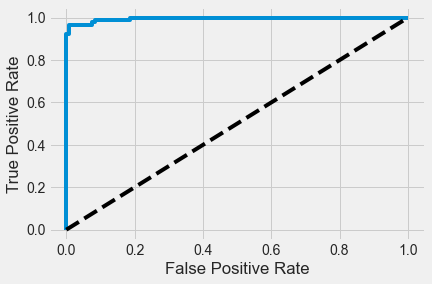

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
import numpy as np
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
thresholds[ix]

0.5335151634308553

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_prob_1)

In [ ]:
precisions

array([0.82142857, 0.81981982, 0.82727273, 0.83486239, 0.84259259,
       0.85046729, 0.85849057, 0.86666667, 0.875     , 0.88349515,
       0.89215686, 0.9009901 , 0.91      , 0.90909091, 0.91836735,
       0.91752577, 0.92708333, 0.93684211, 0.94680851, 0.95698925,
       0.9673913 , 0.97802198, 0.98888889, 0.98876404, 0.98863636,
       0.98850575, 0.98837209, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
recalls

array([1.        , 0.98913043, 0.98913043, 0.98913043, 0.98913043,
       0.98913043, 0.98913043, 0.98913043, 0.98913043, 0.98913043,
       0.98913043, 0.98913043, 0.98913043, 0.97826087, 0.97826087,
       0.9673913 , 0.9673913 , 0.9673913 , 0.9673913 , 0.9673913 ,
       0.9673913 , 0.9673913 , 0.9673913 , 0.95652174, 0.94565217,
       0.93478261, 0.92391304, 0.92391304, 0.91304348, 0.90217391,
       0.89130435, 0.88043478, 0.86956522, 0.85869565, 0.84782609,
       0.83695652, 0.82608696, 0.81521739, 0.80434783, 0.79347826,
       0.7826087 , 0.77173913, 0.76086957, 0.75      , 0.73913043,
       0.72826087, 0.7173913 , 0.70652174, 0.69565217, 0.68478261,
       0.67391304, 0.66304348, 0.65217391, 0.64130435, 0.63043478,
       0.61956522, 0.60869565, 0.59782609, 0.58695652, 0.57608696,
       0.56521739, 0.55434783, 0.54347826, 0.5326087 , 0.52173913,
       0.51086957, 0.5       , 0.48913043, 0.47826087, 0.4673913 ,
       0.45652174, 0.44565217, 0.43478261, 0.42391304, 0.41304

In [ ]:
thresholds

array([0.08403867, 0.08902957, 0.09257543, 0.09666638, 0.097511  ,
       0.10038035, 0.1075405 , 0.11834532, 0.12588388, 0.14508644,
       0.16557064, 0.18387485, 0.18946342, 0.20133097, 0.20760222,
       0.23504295, 0.3059493 , 0.32272044, 0.33267427, 0.42855247,
       0.43387196, 0.43769698, 0.53351516, 0.57130262, 0.73217208,
       0.76077602, 0.7879659 , 0.81565203, 0.88053272, 0.89083278,
       0.89281489, 0.90982192, 0.9138384 , 0.93348077, 0.95272042,
       0.95998276, 0.96326777, 0.97099074, 0.97229677, 0.97316412,
       0.97591748, 0.98801255, 0.99207157, 0.99246667, 0.99304312,
       0.99404366, 0.99422512, 0.99454002, 0.99569833, 0.99589067,
       0.99606617, 0.99628401, 0.99658137, 0.99670109, 0.99675501,
       0.9971252 , 0.99736143, 0.99747336, 0.99752621, 0.99768684,
       0.99776397, 0.99798142, 0.99800444, 0.99802155, 0.99829534,
       0.9984926 , 0.99878569, 0.99906264, 0.99915764, 0.99925337,
       0.99935078, 0.99947823, 0.99958415, 0.99959564, 0.99959

In [ ]:
df_pr_curve = pd.DataFrame(precisions[1:], columns=['precisions'])
df_pr_curve['recalls'] = recalls[1:]
df_pr_curve['thresholds'] = thresholds
df_pr_curve

precisions   recalls  thresholds
0      0.819820  0.989130    0.084039
1      0.827273  0.989130    0.089030
2      0.834862  0.989130    0.092575
3      0.842593  0.989130    0.096666
4      0.850467  0.989130    0.097511
..          ...       ...         ...
107    1.000000  0.043478    0.999958
108    1.000000  0.032609    0.999960
109    1.000000  0.021739    0.999961
110    1.000000  0.010870    0.999980
111    1.000000  0.000000    0.999982

[112 rows x 3 columns]

In [ ]:
df_pr_curve[10:30]

precisions   recalls  thresholds
10    0.900990  0.989130    0.165571
11    0.910000  0.989130    0.183875
12    0.909091  0.978261    0.189463
13    0.918367  0.978261    0.201331
14    0.917526  0.967391    0.207602
15    0.927083  0.967391    0.235043
16    0.936842  0.967391    0.305949
17    0.946809  0.967391    0.322720
18    0.956989  0.967391    0.332674
19    0.967391  0.967391    0.428552
20    0.978022  0.967391    0.433872
21    0.988889  0.967391    0.437697
22    0.988764  0.956522    0.533515
23    0.988636  0.945652    0.571303
24    0.988506  0.934783    0.732172
25    0.988372  0.923913    0.760776
26    1.000000  0.923913    0.787966
27    1.000000  0.913043    0.815652
28    1.000000  0.902174    0.880533
29    1.000000  0.891304    0.890833

Text(0, 0.5, 'Recall')

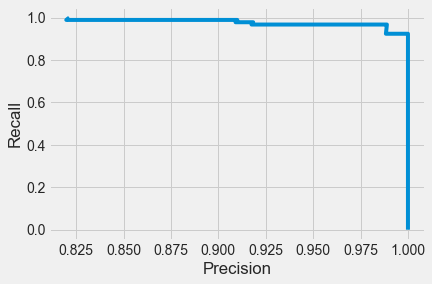

In [ ]:
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")